In [16]:
# import sys
# sys.path.append("..")

import sys
sys.path.append("./server")

from server.optimisation.models import *
from server.optimisation.gen_data import *

def getTicksForDay(id):
    day = Day.model_validate({"day": id, "deferables": getDefDemands(id)})
    ticks = []
    for tick in range(TICKS_PER_DAY):
        sun = getSunlight(tick)
        demand = getInstDemand(id, tick)
        sell, buy = getPrice(id, tick)

        ticks.append(
            Tick.model_validate(
                {
                    "tick": tick,
                    "sun": sun,
                    "demand": demand,
                    "sell_price": sell,
                    "buy_price": buy,
                    "day": id,
                }
            )
        )
    return day, ticks

In [17]:
instant_dem = []
def_dem = []
price = []
for i in range(100000):
    day, tmp = getTicksForDay(143038273 + i)
    instant_dem += [tick.demand for tick in tmp]

    def_ = [i.energy for i in day.deferables]
    def_dem += [max(def_)]
    price = [i.buy_price for i in tmp]
    

print(f"instant max: {max(instant_dem)*5}\ndeferable max: {max(def_dem)}")

instant max: 33.68547516184276
deferable max: 50.0


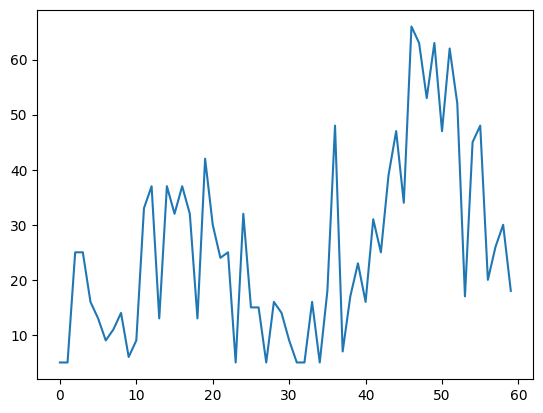

In [10]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(price))][:60], price[:60])

In [15]:
tmp = []

for i in instant_dem:
    if i > 12.5: tmp.append(i)

len(tmp)

0